# Projet SHS

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and cleaning

In [2]:
# Load data
num_subjects = pd.read_csv('data/results.csv')
results = pd.read_csv('data/results.csv')
results

,Unnamed: 0.1,sujet1,A,A.1,sujet2,A.2,B,sujet3,B.1,B.2,...,B.33,sujet 33,B.34,A.30,sujet 34,A.31,A.32,sujet 35,A.33,A.34
0,NaN,ordre apparition,premier passage,deuxième passage,ordre apparition,premier passage,deuxième passage,ordre apparition,premier passage,deuxième passage,...,deuxième passage,ordre d'apparition,premier passage,deuxième passage,ordre d'apparition,premier passage,deuxième passage,ordre d'apparition,premier passage,deuxième passage
1,Ampoule,11,NaN,NaN,8,5,3,3,NaN,NaN,...,NaN,20,1,1,10,NaN,NaN,4,NaN,NaN
2,Ananas,18,13,5,16,NaN,NaN,1,1,1,...,9,11,NaN,11,2,10,6,2,5,8
3,Bottes,2,2,11,2,10,NaN,11,NaN,NaN,...,4,14,NaN,NaN,15,8,5,18,NaN,NaN
4,Bouteille,20,8,12,13,NaN,NaN,14,NaN,NaN,...,NaN,2,NaN,NaN,7,NaN,NaN,15,NaN,NaN
5,Briquet,4,NaN,NaN,4,NaN,NaN,8,NaN,NaN,...,NaN,6,10,8,16,NaN,11,9,NaN,NaN
6,Calculatrice,19,9,8,18,NaN,NaN,6,NaN,NaN,...,2,13,NaN,NaN,3,NaN,NaN,12,NaN,NaN
7,Camion,15,7,7,7,2,4,17,4,5,...,NaN,8,8,3,11,9,7,13,10,3
8,Ciseaux,1,1,1,15,NaN,NaN,10,NaN,NaN,...,5,19,2,NaN,5,6,NaN,16,9,7
9,Classeur,7,11,3,11,7,8,4,NaN,NaN,...,6,10,12,4,4,2,2,8,8,1


## Idées analyses

### 1. Regarder à quel points ils se rappellent des mêmes objets pendant les deux phases de rappel

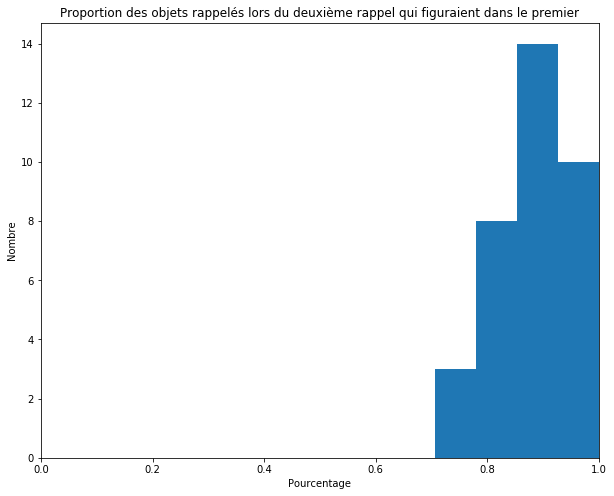

In [3]:
gen = results.T.iterrows()

next(gen)
next(gen)

items = results.loc[1:, results.columns[0]]

scores = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    first.index = items
    second.index = items
    
    first = set(first[~first.isnull()].index)
    second = set(second[~second.isnull()].index)
    
    score = len(second - first)/len(second)
    scores.append(score)
    
    # Skip apparition
    next(gen, None)
    
plt.figure(figsize=(10,8))
plt.hist(1 - np.array(scores), bins=4)
plt.xlim((0, 1))
plt.title("Proportion des objets rappelés lors du deuxième rappel qui figuraient dans le premier")
plt.xlabel("Pourcentage")
plt.ylabel("Nombre")
plt.show()

### 2. Regarder s'ils se rappellent d'autant d'objets les deux fois

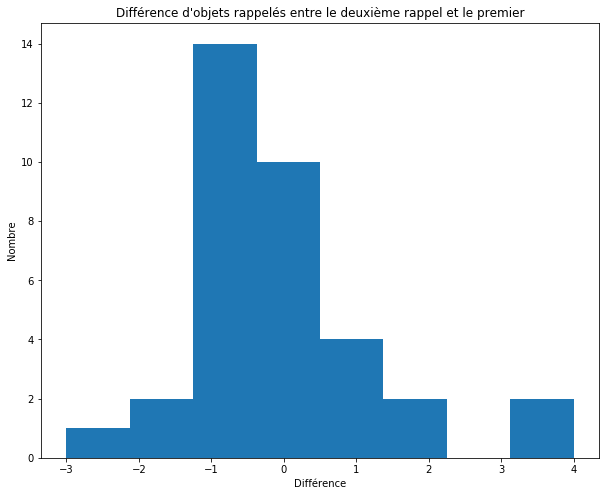

In [4]:
gen = results.T.iterrows()

next(gen)
next(gen)

scores = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    first = len(first[~first.isnull()])
    second = len(second[~second.isnull()])
    
    if second-first==-9:
        print(i)
    
    scores.append(second - first)
    
    # Skip apparition
    next(gen, None)
    
plt.figure(figsize=(10,8))
plt.hist(scores, bins=np.max(scores)-np.min(scores)+1)
plt.title("Différence d'objets rappelés entre le deuxième rappel et le premier")
plt.xlabel("Différence")
plt.ylabel("Nombre")
plt.show()

Une différence négative de par exemple -2 veut dire que la personne s'est rappelé de 2 objets de moins au deuxième passage

### 3. Regarder si l'ordre de rappel et d'appartition sont similaires (l'endroit, l'envers, ...) - entre l'apparaition et le premier rappel, apparition et deuxième rappel, premier rappel et deuxième rappel

In [5]:
# https://stackoverflow.com/questions/24547641/python-length-of-longest-common-subsequence-of-lists
def lcs_length(a, b):
    table = [[0] * (len(b) + 1) for _ in range(len(a) + 1)]
    for i, ca in enumerate(a, 1):
        for j, cb in enumerate(b, 1):
            table[i][j] = (
                table[i - 1][j - 1] + 1 if ca == cb else
                max(table[i][j - 1], table[i - 1][j]))
    return table[-1][-1]

In [6]:
gen = results.T.iterrows()

next(gen)
next(gen)

items = results.loc[1:, results.columns[0]]

scores = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    first.index = items
    second.index = items
    
    first = first[~first.isnull()].astype(int)
    first.sort_values(inplace=True)
    first = list(first.index)
    
    second = second[~second.isnull()].astype(int)
    second.sort_values(inplace=True)
    second = list(second.index)
    
    first = [item for item in first if item in second]
    second = [item for item in second if item in first]

    score = lcs_length(first, second)
    scores.append(score)
    
    # Skip apparition
    next(gen, None)

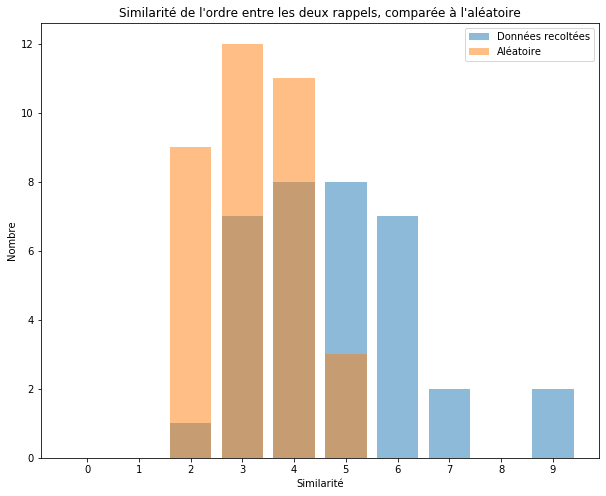

In [7]:
np.random.seed(1)
sizes = [9, 10, 11, 12, 13]
items = results.loc[1:, results.columns[0]]

scores_random = []

for _ in range(len(scores)):
    first = np.random.choice(items.values, size=np.random.choice(sizes), replace=False)
    second = np.random.choice(items.values, size=np.random.choice(sizes), replace=False)
    
    first = [item for item in first if item in second]
    second = [item for item in second if item in first]

    score = lcs_length(first, second)
    scores_random.append(score)
    
scores = np.array(scores)
scores_random = np.array(scores_random)
    
x = np.arange(np.max(scores)+1)
heights = [len(scores[scores == value]) for value in x]
heights_random = [len(scores_random[scores_random == value]) for value in x]

plt.figure(figsize=(10,8))
plt.bar(x, heights, label='Données recoltées', alpha=0.5)
plt.bar(x, heights_random, label='Aléatoire', alpha=0.5)
plt.xticks(x)
plt.legend()
plt.title("Similarité de l'ordre entre les deux rappels, comparée à l'aléatoire")
plt.xlabel("Similarité")
plt.ylabel("Nombre")
plt.show()

Pour calculer la similarité on calcule la taille de la plus grande sub-list ordrée où l'on permet les oublis.

On peut voir qu'il y a un taut de similarité plus important qu'avec l'aléatoire.

### 4. Étudier l'effet de primauté et récence

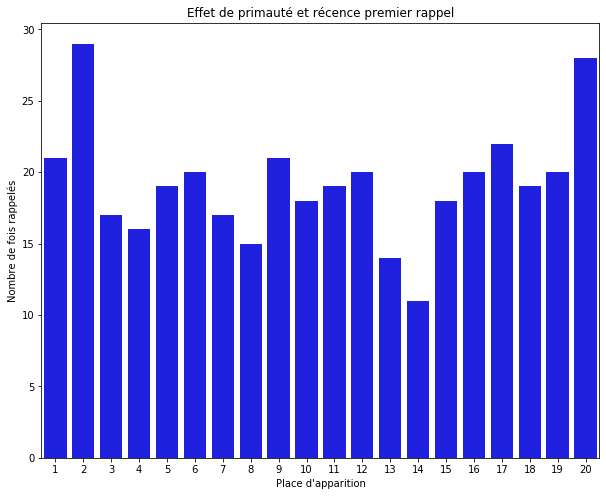

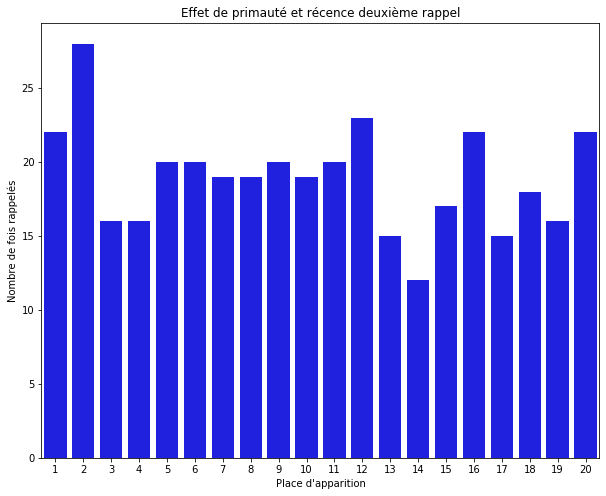

In [8]:
order_appear = results.loc[:, results.columns[1::3]].values[1:].reshape(-1)
first_recall = results.loc[:, results.columns[2::3]].values[1:].reshape(-1)
second_recall = results.loc[:, results.columns[3::3]].values[1:].reshape(-1)

na_mask = np.vectorize(pd.isna)

first_recalled = order_appear[~na_mask(first_recall)].astype(int)
second_recalled = order_appear[~na_mask(second_recall)].astype(int)

plt.figure(figsize=(10,8))
sns.countplot(first_recalled, color='blue')
plt.title("Effet de primauté et récence premier rappel")
plt.xlabel("Place d'apparition")
plt.ylabel("Nombre de fois rappelés")
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(second_recalled, color='blue')
plt.title("Effet de primauté et récence deuxième rappel")
plt.xlabel("Place d'apparition")
plt.ylabel("Nombre de fois rappelés")
plt.show()

### 5. Regarder si certains objets sont plus cités que d'autres

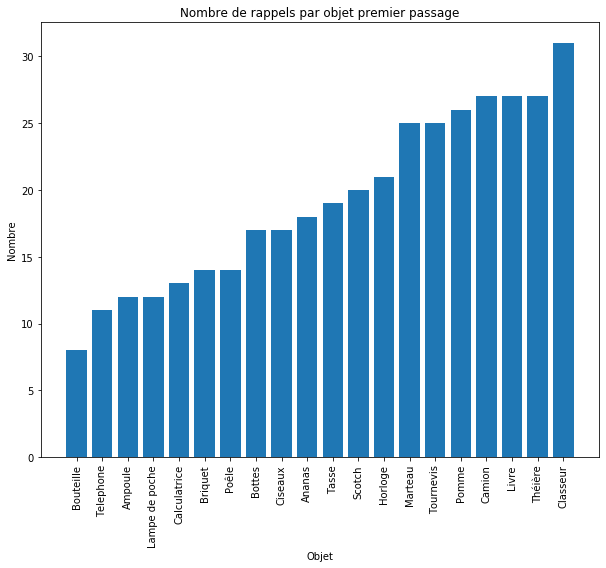

In [9]:
object_apperance = results.loc[1:, results.columns[2::3]].T
object_apperance.columns = results.loc[1:, results.columns[0]]
object_apperance = (~object_apperance.isnull()).sum()

values = list(zip(object_apperance.index, object_apperance.values))
values = list(sorted(values, key=lambda x: x[1]))
items = [value[0] for value in values]
counts = [value[1] for value in values]

plt.figure(figsize=(10,8))
plt.bar(items, counts)
plt.xticks(rotation=90)
plt.title("Nombre de rappels par objet premier passage")
plt.xlabel("Objet")
plt.ylabel("Nombre")
plt.show()

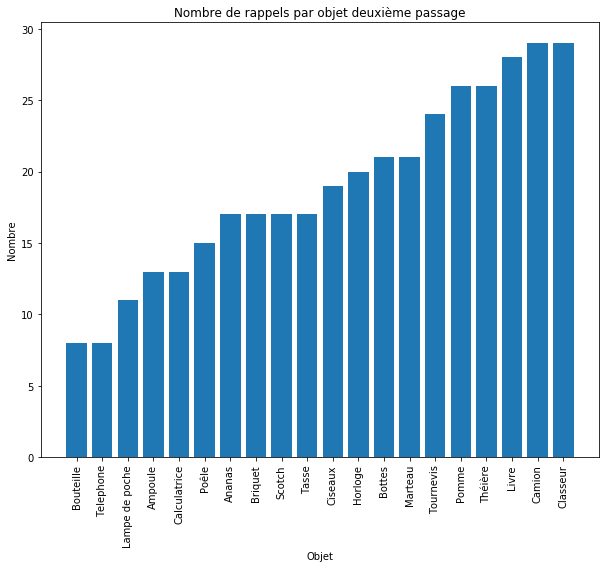

In [10]:
object_apperance = results.loc[1:, results.columns[3::3]].T
object_apperance.columns = results.loc[1:, results.columns[0]]
object_apperance = (~object_apperance.isnull()).sum()

values = list(zip(object_apperance.index, object_apperance.values))
values = list(sorted(values, key=lambda x: x[1]))
items = [value[0] for value in values]
counts = [value[1] for value in values]

plt.figure(figsize=(10,8))
plt.bar(items, counts)
plt.xticks(rotation=90)
plt.title("Nombre de rappels par objet deuxième passage")
plt.xlabel("Objet")
plt.ylabel("Nombre")
plt.show()

### 6. Si assez de femme, on peut regarder s'il y a une différence entre les genres...
ça part

### 7. Regarder objets (par exemple pomme) sont plus rappelés pendant la forêt ou le désert

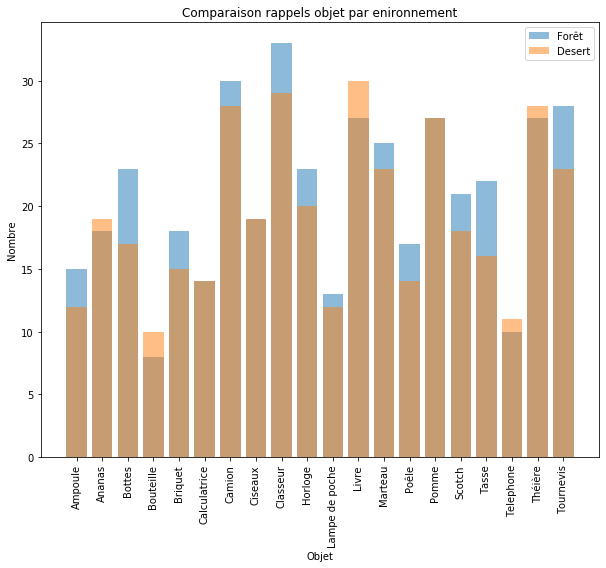

In [11]:
plt.figure(figsize=(10,8))

for env in ['A', 'B']:
    df = results.loc[1:, filter(lambda c: env in c, results.columns)]
    df.reset_index(inplace=True)
    df.index = results[results.columns[0]][1:]
    df = (~df.T.isnull()).sum()
     
    label = "Forêt" if env == 'A' else 'Desert'
    
    plt.bar(df.index, df.values, alpha=0.5, label=label)

plt.legend()
plt.xticks(rotation=90)
plt.title("Comparaison rappels objet par enironnement")
plt.xlabel("Objet")
plt.ylabel("Nombre")
plt.show()

### 8. Regarder si les gens se rappellent de certaines catégories (par exemple tous les outils, tous les ustensiles, couleur, charactéristique commune), ou alors si tous les outils sont dits ensemble lors des rappels, etc...

In [13]:
groups = {
    'outils': ['Tournevis', 'Marteau'],
    'cuisine': ['Théière', 'Poêle', 'Tasse'],
    'fruits': ['Pomme', 'Ananas'],
    'école': ['Scotch', 'Classeur', 'Calculatrice', 'Ciseaux', 'Livre'],
    'ménager': ['Horloge', 'Ampoule'],
    'lumière': ['Briquet', 'Ampoule', 'Lampe de poche']
}

#### Ecole

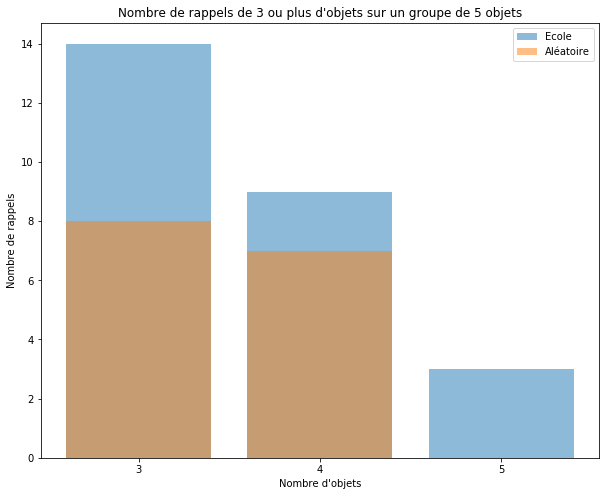

Pourcentage de rappels de 3 objets ou plus:
	Pour école: 74.29%
	Pour aléatoire: 42.86%


In [14]:
np.random.seed(1)

items = results.loc[1:, results.columns[0]]

cluster_ecole = groups['école']
cluster_random = np.random.choice(items, size=len(cluster_ecole), replace=False)

first_recall = results.loc[1:, results.columns[2::3]].T
first_recall.columns = results.loc[1:, results.columns[0]]
first_recall = first_recall.loc[:, cluster_ecole]

first_recall_random = results.loc[1:, results.columns[2::3]].T
first_recall_random.columns = results.loc[1:, results.columns[0]]
first_recall_random = first_recall_random.loc[:, cluster_random]

size = len(first_recall)
three = ((~first_recall.T.isnull()).sum() == 3).sum()
four = ((~first_recall.T.isnull()).sum() == 4).sum()
five = ((~first_recall.T.isnull()).sum() == 5).sum()
percent = (three + four + five)/size

three_random = ((~first_recall_random.T.isnull()).sum() == 3).sum()
four_random = ((~first_recall_random.T.isnull()).sum() == 4).sum()
five_random = ((~first_recall_random.T.isnull()).sum() == 5).sum()
percent_random = (three_random + four_random + five_random)/size


x = [3, 4, 5]
heights = [three, four, five]
heights_random = [three_random, four_random, five_random]

plt.figure(figsize=(10,8))
plt.bar(x, heights, label='Ecole', alpha=0.5)
plt.bar(x, heights_random, label='Aléatoire', alpha=0.5)
plt.xticks(x)
plt.legend()
plt.title("Nombre de rappels de 3 ou plus d'objets sur un groupe de 5 objets")
plt.xlabel("Nombre d'objets")
plt.ylabel("Nombre de rappels")
plt.show()
print(f"Pourcentage de rappels de 3 objets ou plus:\n\tPour école: {percent*100:.2f}%\n\tPour aléatoire: {percent_random*100:.2f}%")

#### Outils

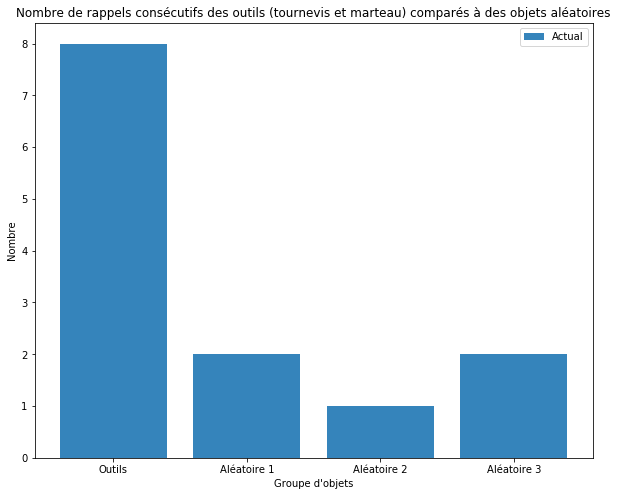

Pourcentage de rappels consécutifs:
	Pour outils: 22.86%
	Pour aléatoire: 4.76%


In [15]:
np.random.seed(1)

items = results.loc[1:, results.columns[0]]

cluster_outils = groups['outils']

first_recall = results.loc[1:, results.columns[2::3]].T
first_recall.columns = results.loc[1:, results.columns[0]]
first_recall = first_recall.loc[:, cluster_outils]

size = len(first_recall)

tournevis = first_recall['Tournevis'].fillna(-100).astype(int)
marteau = first_recall['Marteau'].fillna(-100).astype(int)
distances = tournevis - marteau
counts = (np.abs(distances) == 1).sum()
percent = counts / size

x = ["Outils"]
heights = [counts]

for i in range(3):
    cluster = np.random.choice(items, size=len(cluster_outils), replace=False)
    first_recall = results.loc[1:, results.columns[2::3]].T
    first_recall.columns = results.loc[1:, results.columns[0]]
    first_recall = first_recall.loc[:, cluster]

    objet0 = first_recall[cluster[0]].fillna(-100).astype(int)
    objet1 = first_recall[cluster[1]].fillna(-100).astype(int)
    distances = objet0 - objet1
    counts = (np.abs(distances) == 1).sum()
    
    x.append(f"Aléatoire {i+1}")
    heights.append(counts)

plt.figure(figsize=(10,8))
plt.bar(x, heights, label='Actual', alpha=0.9)
plt.xticks(x)
plt.legend()
plt.title("Nombre de rappels consécutifs des outils (tournevis et marteau) comparés à des objets aléatoires")
plt.xlabel("Groupe d'objets")
plt.ylabel("Nombre")
plt.show()
print(f"Pourcentage de rappels consécutifs:\n\tPour outils: {percent*100:.2f}%\n\tPour aléatoire: {np.mean(heights[1:])/size*100:.2f}%")